In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("credit_train.csv")
# test=pd.read_csv("credit_test.csv")

In [ ]:
train

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.shape

(100514, 19)

In [ ]:
train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
train.replace(r'^\s*$', np.nan,regex=True,inplace=True)
train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
train.drop(['Customer ID','Years of Credit History','Loan ID','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Tax Liens','Years in current job','Loan Status','Number of Credit Problems','Maximum Open Credit','Tax Liens'], axis=1,inplace=True)

In [ ]:
train.isnull().sum()

Current Loan Amount         514
Term                        514
Credit Score              19668
Annual Income             19668
Home Ownership              514
Purpose                     514
Monthly Debt                514
Current Credit Balance      514
Bankruptcies                718
dtype: int64

In [ ]:
train.dropna(inplace=True)
train.isnull().sum()

Current Loan Amount       0
Term                      0
Credit Score              0
Annual Income             0
Home Ownership            0
Purpose                   0
Monthly Debt              0
Current Credit Balance    0
Bankruptcies              0
dtype: int64

In [ ]:
print(train.shape)

(80684, 9)


In [ ]:
# data.Gender=data.Gender.map({'Male':1,'Female':0})
train.Term.value_counts()

Short Term    57578
Long Term     23106
Name: Term, dtype: int64

In [ ]:
train.Term=train.Term.map({'Short Term':1,'Long Term':0})

In [ ]:
train.Term

0        1
2        1
3        0
5        1
6        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Term, Length: 80684, dtype: int64

In [ ]:
train['Home Ownership'].value_counts()

Home Mortgage    39033
Rent             34002
Own Home          7464
HaveMortgage       185
Name: Home Ownership, dtype: int64

In [ ]:
train['Home Ownership']=train['Home Ownership'].map({'Home Mortgage':0,'Rent':1,'Own Home':2,'HaveMortgage':3})

In [ ]:
train['Home Ownership']

0        0
2        2
3        2
5        0
6        0
        ..
99995    2
99996    1
99997    1
99998    1
99999    2
Name: Home Ownership, Length: 80684, dtype: int64

In [ ]:
# # x=train['Purpose'].value_counts()
# # x
# y=(train['Purpose'].unique())
# i=0
# dict1={}
# for j in y:
#   dict1.update({j:i})
#   i+=1
# print(dict1)
# # for i 
# # train.Purpose=train.Purpose.map()
# # df2=df.replace({"Courses": dict})
# for ind in dict1:
#   train=train.replace({Purpose: dict1})
# print(train.Purpose)
train.Purpose=train.Purpose.map({'Home Improvements': 0, 'Debt Consolidation': 1, 'Buy House': 2, 'Business Loan': 3, 'other': 4, 'major_purchase': 5, 'Take a Trip': 6, 'Other': 7, 'Buy a Car': 8, 'small_business': 9, 'Medical Bills': 10,
                                 'wedding': 11, 'vacation': 12, 'Educational Expenses': 13,
                                 'moving': 14, 'renewable_energy': 15})
train.Purpose




# l=[]
# l.append(x)
# l[0][0]

0        0
2        1
3        1
5        1
6        1
        ..
99995    4
99996    1
99997    1
99998    1
99999    1
Name: Purpose, Length: 80684, dtype: int64

In [ ]:
print(train)

       Current Loan Amount  Term  Credit Score  Annual Income  Home Ownership  \
0                 445412.0     1         709.0      1167493.0               0   
2               99999999.0     1         741.0      2231892.0               2   
3                 347666.0     0         721.0       806949.0               2   
5                 206602.0     1        7290.0       896857.0               0   
6                 217646.0     1         730.0      1184194.0               0   
...                    ...   ...           ...            ...             ...   
99995             147070.0     1         725.0       475437.0               2   
99996           99999999.0     1         732.0      1289416.0               1   
99997             103136.0     1         742.0      1150545.0               1   
99998             530332.0     1         746.0      1717524.0               1   
99999           99999999.0     1         743.0       935180.0               2   

       Purpose  Monthly Deb

In [ ]:
train.Bankruptcies.value_counts()

0.0    71696
1.0     8545
2.0      331
3.0       81
4.0       22
5.0        6
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [ ]:
x=0
for index, row in train.iterrows():
  if (row["Credit Score"]<750):
    x+=1
print(x)

74194


In [ ]:
train.insert(9,"Loan_given",value='0')
# train.insert(17, "Count", value='0')
# train.insert(18, "yes", value='0')

In [ ]:
train

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Current Credit Balance,Bankruptcies,Loan_given
0,445412.0,1,709.0,1167493.0,0,0,5214.74,228190.0,1.0,0
2,99999999.0,1,741.0,2231892.0,2,1,29200.53,297996.0,0.0,0
3,347666.0,0,721.0,806949.0,2,1,8741.90,256329.0,0.0,0
5,206602.0,1,7290.0,896857.0,0,1,16367.74,215308.0,0.0,0
6,217646.0,1,730.0,1184194.0,0,1,10855.08,122170.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,1,725.0,475437.0,2,4,2202.86,47766.0,0.0,0
99996,99999999.0,1,732.0,1289416.0,1,1,13109.05,153045.0,0.0,0
99997,103136.0,1,742.0,1150545.0,1,1,7315.57,109554.0,1.0,0
99998,530332.0,1,746.0,1717524.0,1,1,9890.07,404225.0,0.0,0


In [ ]:
from pandas.core.roperator import rpow
# for i in range len(train)
# print(len(train))
# for i in range len(train):
#   print(train)
no=0  
y=0
given=True
f1=0
f2=0
f4=0
f3=0


for ind in train.index:
  count=0
  yes=0
  if train["Bankruptcies"][ind]>0:
    # and train["Credit Score"][ind]>750
    given=False
  else:
    if ((train["Annual Income"][ind]/12)*27>=train["Current Loan Amount"][ind] and train["Credit Score"][ind]>700):
      # count+=1
      yes+=1 
      # f4+=1
    else:
      if (((train["Annual Income"][ind]/12)*27<=train["Current Loan Amount"][ind] and (train["Annual Income"][ind]/12)*30>=train["Current Loan Amount"][ind] and train["Credit Score"][ind]>600)):
        count+=1
        # f1+=1
      if((train["Annual Income"][ind]/12)*27<=train["Current Loan Amount"][ind] and train["Home Ownership"][ind]==2):
        count+=1
        # f2+=2
      if(train["Current Credit Balance"][ind]>0.5*train["Current Loan Amount"][ind]):
        count+=1
      # f3+=1
  # print(count)
  # if(yes==1):
  #   f4+=1
  if  count>=1 or yes==1:
    # f1+=1
    train["Loan_given"][ind]=1
    if(yes==1):
      f1+=1
    if(count==1):
      f2+=1
  else:
    train["Loan_given"][ind]=0

# print(train["Loan_given"])

    # else:
    #   no+=1

train.to_csv('New_file_credit.csv')
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# test1=pd.read_csv("New_file_credit.csv")
# test1
# print(train["Loan_given"])
print(f1,f2)

47809 10337


In [ ]:
# test1.drop(['Unnamed:'],axis=1,inplace=True)

In [ ]:
train["Loan_given"].value_counts()

1    58146
0    22538
Name: Loan_given, dtype: int64

# DATA VISUALIZATION

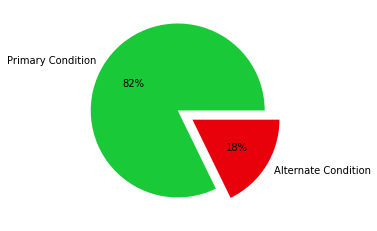

In [ ]:
# #define data
data = [f1,f2]
labels = ['Primary Condition', 'Alternate Condition']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[2:4]
explode = [0.1, 0.1]

# create pie chart
plt.pie(data, labels = labels, colors = colors, explode=explode, autopct='%.0f%%')
plt.show()



In [ ]:
train["Home Ownership"].value_counts()

0    39033
1    34002
2     7464
3      185
Name: Home Ownership, dtype: int64

In [ ]:
h1=0
h2=0
h3=0
h4=0
for ind in train.index:
  if(train["Loan_given"][ind]==1 and train["Home Ownership"][ind]==0):
    h1+=1
  if(train["Loan_given"][ind]==1 and train["Home Ownership"][ind]==1):
    h2+=1
  if(train["Loan_given"][ind]==1 and train["Home Ownership"][ind]==2):
    h3+=1
  if(train["Loan_given"][ind]==1 and train["Home Ownership"][ind]==3):
    h4+=1

h11=0
h22=0
h33=0
h44=0
for ind in train.index:
  if(train["Loan_given"][ind]==0 and train["Home Ownership"][ind]==0):
    h11+=1
  if(train["Loan_given"][ind]==0 and train["Home Ownership"][ind]==1):
    h22+=1
  if(train["Loan_given"][ind]==0 and train["Home Ownership"][ind]==2):
    h33+=1
  if(train["Loan_given"][ind]==0 and train["Home Ownership"][ind]==3):
    h44+=1

print(h1,h2,h3,h4)


27682 24157 6179 128


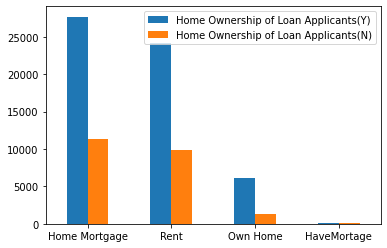

In [ ]:
index=['Home Mortgage','Rent','Own Home', 'HaveMortage']
df = pd.DataFrame({'Home Ownership of Loan Applicants(Y)':[h1,h2,h3,h4], 'Home Ownership of Loan Applicants(N)':[h11,h22,h33,h44]},index=index)
ax = df.plot.bar(rot=0)

In [ ]:
X=train.iloc[:,:-1]
X=X.astype('int')
# y=y.astype('int')
Y=train.iloc[:,-1:]
Y=Y.astype('int')
Y

,Loan_given
0,0
2,1
3,1
5,1
6,0
...,...
99995,1
99996,0
99997,0
99998,1


In [ ]:
X.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Current Credit Balance',
       'Bankruptcies'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold 
# from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=18)

X_train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Current Credit Balance,Bankruptcies
98912,445962,0,739,1793638,0,1,5081,195700,0
60823,261206,1,741,864728,1,1,15709,245746,0
29528,330264,1,745,2229840,0,1,22670,361836,0
87907,440066,1,716,1099682,1,1,9988,107863,0
21883,99999999,1,743,1912350,0,7,8669,376067,0


In [ ]:
# models=[]
# models.append(("Logistic Regression",LogisticRegression()))
# # models.append(("Decision Tree",DecisionTreeClassifier()))
# # models.append(("Random Forest",RandomForestClassifier()))
# models.append(("Support Vector Classifier",SVC()))
# models.append(("Naive Bayes",GaussianNB()))


In [ ]:
# scoring='accuracy'
# for name,model in models:
#     kfold=KFold(n_splits=10)
#     cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
#     result.append(cv_result)
#     names.append(name)
#     print(model)
#     print("%s %f" % (name,cv_result.mean()))


In [ ]:
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
LR=LogisticRegression()
cross_val_score(LR,X_train,Y_train,scoring=make_scorer(accuracy_score),cv=3)
LR.fit(X_train,Y_train)    
pred=LR.predict(X_test)

print("Decision Tree",)
print("Model Accuracy:- ",accuracy_score(Y_test,pred))
print("Confusion Matrix:-",confusion_matrix(Y_test,pred))
print("Classifivation Report:-",classification_report(Y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Decision Tree
Model Accuracy:-  0.8374369990911344
Confusion Matrix:- [[ 3048  3658]
 [  277 17223]]
Classifivation Report:-               precision    recall  f1-score   support

           0       0.92      0.45      0.61      6706
           1       0.82      0.98      0.90     17500

    accuracy                           0.84     24206
   macro avg       0.87      0.72      0.75     24206
weighted avg       0.85      0.84      0.82     24206



In [ ]:
import pickle
from sklearn import svm
# now you can save it to a file
file = 'ML_Model11.pkl'
with open(file, 'wb') as f:
    pickle.dump(LR, f)

In [ ]:
# print(result)

In [ ]:
# print(names[3])
# print(result[3].mean())

In [ ]:
# print(svc)

In [ ]:
# print(test1.columns)

In [ ]:
# test1